# Введение в машинное обучение

## Семинар #3

### Екатерина Кондратьева

ekaterina.kondrateva@skoltech.ru

## Регуляризация в линейных моделях. Метод Ближайших Соседей (KNN)

## 1. Регуляризация в линейных моделях

Регуляризация - наложение ограничения на решающае правило через нормы. Это нужно для борьбы с переобучением методом отбора признаков. 

Источники:
1. https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/lecture-notes/lecture03-linregr.pdf    
2. http://www.machinelearning.ru/wiki/images/7/7e/VetrovSem11_LARS.pdf
3. https://ru.coursera.org/lecture/supervised-learning/rieghuliarizatsiia-sR94Q
4. https://towardsdatascience.com/regularization-in-machine-learning-connecting-the-dots-c6e030bfaddd

In [1]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split

### Начнем Логистической регрессии:

Посмотрим на датасет предсказания рака груди:

In [3]:
#load the breast cancer data and few EDA
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
# Разобьем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)

print('Точность на обучающей выборке: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Точность на тестовой выборке: {:.3f}'.format(log_reg.score(X_test,y_test)))

Точность на обучающей выборке: 0.955
Точность на тестовой выборке: 0.958


In [5]:
log_reg.score(X_train,y_train)

0.9553990610328639

In [6]:
y_pred = log_reg.predict(X_train)

In [7]:
accuracy_score(y_pred, y_train)

0.9553990610328639

In [8]:
cancer.data.shape, X_train.shape

((569, 30), (426, 30))

#### Посмотрим на коэффициенты модели:

In [9]:
log_reg?

In [10]:
cancer.data.shape[1]

30

In [11]:
log_reg.coef_[0]

array([ 1.90876683e+00,  9.98788148e-02, -7.65567571e-02,  1.30875965e-03,
       -1.36948317e-01, -3.86693503e-01, -5.71948682e-01, -2.83323656e-01,
       -2.23813863e-01, -3.50526844e-02,  3.04455316e-03,  1.25223693e+00,
        9.49523571e-02, -9.63789785e-02, -1.32044174e-02, -2.43125981e-02,
       -5.86034313e-02, -3.35199227e-02, -4.10795998e-02,  1.53205924e-03,
        1.24707244e+00, -3.19709151e-01, -9.61881472e-02, -2.66335879e-02,
       -2.44041661e-01, -1.24420873e+00, -1.58319440e+00, -5.78354663e-01,
       -6.80060645e-01, -1.30760323e-01])

In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
log_reg.coef_[0]

array([ 1.90876683e+00,  9.98788148e-02, -7.65567571e-02,  1.30875965e-03,
       -1.36948317e-01, -3.86693503e-01, -5.71948682e-01, -2.83323656e-01,
       -2.23813863e-01, -3.50526844e-02,  3.04455316e-03,  1.25223693e+00,
        9.49523571e-02, -9.63789785e-02, -1.32044174e-02, -2.43125981e-02,
       -5.86034313e-02, -3.35199227e-02, -4.10795998e-02,  1.53205924e-03,
        1.24707244e+00, -3.19709151e-01, -9.61881472e-02, -2.66335879e-02,
       -2.44041661e-01, -1.24420873e+00, -1.58319440e+00, -5.78354663e-01,
       -6.80060645e-01, -1.30760323e-01])

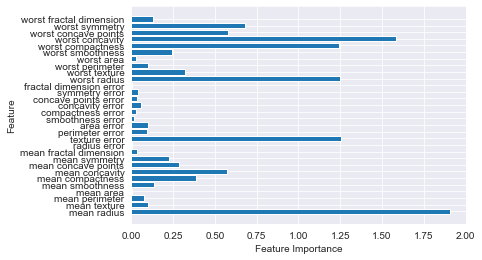

In [14]:
# Построим график значимости признаков (веса регрессионной модели)
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), abs(log_reg.coef_[0]), align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [15]:
LogisticRegression(C= 0.1, penalty='l1')

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Какая регуляризация используется в модели?**

Наиболее полная справка о построенной модели доступна в библиотеке `statsmodels.api`, однако в ней не поддреживаются некоторые регуляризации и их нужно прописывать формульно. В `statsmodels.api` вы можете получить полный вывод для составления уравнения регрессии, с p-value и интервалом достоверности, огранизованным в виде таблицы.


Однако, чаще используется `sklearn.linear_model.LogisticRegression()`, в котором частично информацию можно получить через `.feature_importances` или `.coef`.

In [16]:
# добавим константу, чтобы посчитать нулевой коэффициент
X = sm.add_constant(X_train)
# подгрузим модель
model = sm.OLS(y_train, X)

results = model.fit()

In [17]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.767    
Dependent Variable: y                AIC:                -0.3320  
Date:               2019-11-14 19:40 BIC:                125.3556 
No. Observations:   426              Log-Likelihood:     31.166   
Df Model:           30               F-statistic:        47.73    
Df Residuals:       395              Prob (F-statistic): 3.90e-112
R-squared:          0.784            Scale:              0.054550 
--------------------------------------------------------------------
          Coef.     Std.Err.      t      P>|t|     [0.025     0.975]
--------------------------------------------------------------------
const      3.8053     0.5294    7.1886   0.0000     2.7646    4.8460
x1         0.2524     0.2006    1.2580   0.2091    -0.1420    0.6468
x2        -0.0083     0.0089   -0.9311   0.3524    -0.0257    0.0092
x3        -0.0385     0.0291   -1.3224   0.1868    -0.0957    0.0187
x4         0.0001     0.0006    0.1751   0.8611    -0.0011    0.0013
x5        -2.1171     2.3080   -0.9173   0.3595    -6.6546    2.4203
x6         6.0460     1.6428    3.6802   0.0003     2.8162    9.2758
x7        -1.3757     1.1786   -1.1673   0.2438    -3.6928    0.9413
x8        -0.8200     2.3402   -0.3504   0.7262    -5.4208    3.7808
x9        -0.5005     0.8568   -0.5842   0.5594    -2.1849    1.1838
x10       -7.7307     6.3578   -1.2159   0.2247   -20.2300    4.7686
x11       -0.6535     0.3523   -1.8546   0.0644    -1.3462    0.0392
x12       -0.0237     0.0410   -0.5788   0.5631    -0.1044    0.0569
x13        0.0619     0.0496    1.2490   0.2124    -0.0355    0.1593
x14       -0.0002     0.0018   -0.0876   0.9303    -0.0037    0.0034
x15      -18.7181     7.2611   -2.5779   0.0103   -32.9934   -4.4428
x16       -1.7424     2.4570   -0.7092   0.4786    -6.5728    3.0880
x17        4.0012     1.4780    2.7072   0.0071     1.0955    6.9070
x18      -10.9519     6.7761   -1.6162   0.1068   -24.2737    2.3699
x19        1.6453     3.0954    0.5315   0.5953    -4.4403    7.7309
x20       12.6612    13.0358    0.9713   0.3320   -12.9671   38.2894
x21       -0.1697     0.0652   -2.6045   0.0095    -0.2979   -0.0416
x22       -0.0041     0.0077   -0.5272   0.5983    -0.0193    0.0111
x23        0.0017     0.0066    0.2526   0.8007    -0.0113    0.0147
x24        0.0009     0.0004    2.6258   0.0090     0.0002    0.0017
x25        0.2240     1.5747    0.1422   0.8870    -2.8719    3.3198
x26       -0.2398     0.4404   -0.5444   0.5865    -1.1056    0.6261
x27       -0.4139     0.3034   -1.3643   0.1733    -1.0104    0.1826
x28       -1.1126     1.0658   -1.0439   0.2972    -3.2080    0.9827
x29       -0.7670     0.5649   -1.3578   0.1753    -1.8775    0.3435
x30       -2.8485     2.6368   -1.0803   0.2807    -8.0324    2.3353
------------------------------------------------------------------
Omnibus:              21.609       Durbin-Watson:          2.105  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       23.509 
Skew:                 -0.565       Prob(JB):               0.000  
Kurtosis:             3.222        Condition No.:          1492152
==================================================================
* The condition number is large (1e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [18]:
results.params

array([ 3.80531507e+00,  2.52390857e-01, -8.27017047e-03, -3.84846472e-02,
        1.07706438e-04, -2.11714344e+00,  6.04602710e+00, -1.37572098e+00,
       -8.19984841e-01, -5.00538522e-01, -7.73066061e+00, -6.53467433e-01,
       -2.37476925e-02,  6.19050809e-02, -1.59167418e-04, -1.87181366e+01,
       -1.74242482e+00,  4.00123010e+00, -1.09518840e+01,  1.64532103e+00,
        1.26611650e+01, -1.69732559e-01, -4.07692784e-03,  1.67145963e-03,
        9.45166626e-04,  2.23975468e-01, -2.39751842e-01, -4.13930800e-01,
       -1.11264171e+00, -7.67002817e-01, -2.84851663e+00])

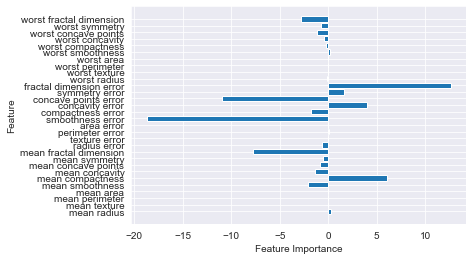

In [19]:
# Построим график значимости признаков
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), results.params[1:], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Регуляризация

## L1 Lasso regularisation:

Объяснение ближе к математическому: 
    https://stats.stackexchange.com/questions/45643/why-l1-norm-for-sparse-models

In [20]:
log_reg = LogisticRegression(penalty='l1') # посмотрим, что это значит в справке
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.960
Accuracy on the test set: 0.958


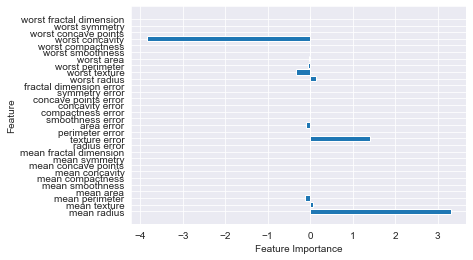

In [21]:
# График значимости
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), log_reg.coef_[0], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [22]:
log_reg.coef_[log_reg.coef_ != 0]

array([ 3.31649189,  0.07742286, -0.11902443, -0.01110904,  1.40124149,
       -0.0930121 ,  0.12722809, -0.32373915, -0.06100889, -0.01815835,
       -3.8495292 ])

In [23]:
# len(log_reg.coef_[log_reg.coef_!=0])

Нужно ли стандартизовывать данные перед обучением и как это влияет на построение модели?

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

In [25]:
# посмотрим на краевые значения
X_train.max(), X_train.min()

(3432.0, 0.0)

In [26]:
X_train_sc.max(), X_train_sc.min()

(11.78432971988764, -2.7050457451563212)

Accuracy on the training set: 0.955
Accuracy on the training set: 0.958


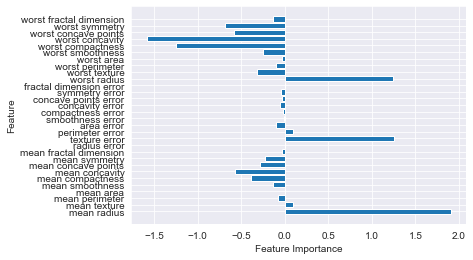

In [27]:
log_reg = LogisticRegression() # check the model params
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), log_reg.coef_[0], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Accuracy on the training set: 0.913
Accuracy on the training set: 0.923


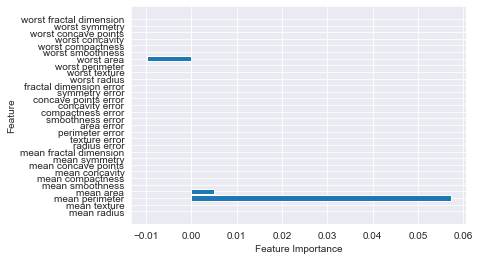

In [28]:
log_reg = LogisticRegression(penalty='l1', C=0.001) # вторая
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), log_reg.coef_[0], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

#### Сколько осталось ненулевых коэффициентов после применения резуляризации?

In [29]:
len(log_reg.coef_[log_reg.coef_!=0])

3

####  Насколько мы можем верить тому, что на 3х признаках точность упала всего на 3%?

Что если повторить эксперимент с регуляризацией на 5-10 различных разбиениях 
`random_seed` или на кросс-валидации? (ДЗ)

## Elastic net (L1 & L2 regularisation):

Пример работы совмещенной регуляризации, на практике применим только в специфичных задачах

In [30]:
model

In [31]:
results = model.fit_regularized() # method='elastic_net'

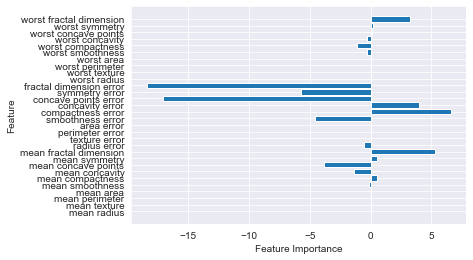

In [32]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), results.params[1:], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [33]:
results.params

array([ 1.05775851e+00, -1.11364622e-02, -8.41758442e-03,  1.74559921e-03,
       -4.29971441e-05, -1.61079193e-01,  5.48552008e-01, -1.35056757e+00,
       -3.87387081e+00,  5.09518885e-01,  5.26762800e+00, -5.59527806e-01,
        6.72555089e-02,  5.24001299e-02,  1.27370868e-03, -4.59583842e+00,
        6.60749077e+00,  3.98818455e+00, -1.71137454e+01, -5.72952167e+00,
       -1.84201483e+01, -1.26242446e-02, -8.90072176e-03,  2.30995792e-03,
       -1.01525290e-04, -3.09343136e-01, -1.08542384e+00, -3.20846070e-01,
        9.71954911e-02,  2.08166100e-01,  3.23479881e+00])

In [34]:
len(results.params)

31

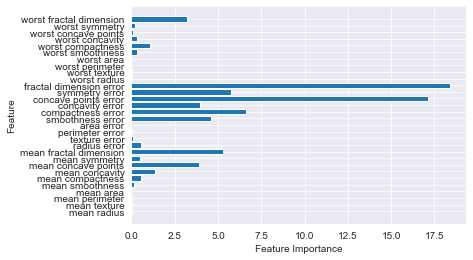

In [35]:
plt.barh(range(n_feature), abs(results.params[1:]), align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Вопросы:

- Помогла ли l1 "жесткая" регуляризация избежать переобучения?
- Переобучилась ли модель на нескольких характеристиках?
- Как это проверить?

## 2. k Nearest Neighbors



`Sklearn`:
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html'>Regressor</a>
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>Classifier</a>

In [36]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Тренируем

In [37]:
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


#######
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


In [38]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 1. Метрики и ядерные функции:

### Метрики, реализованные в `sklearn`:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

### Специальные метрики для токенизации в пакете:
https://pypi.org/project/Distance/

### Или здесь:

http://www.nltk.org/_modules/nltk/align/bleu_score.html

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

Какая метрика стоит по дефолту?

In [40]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Классифицируем попарно для того, чтобы сделать отрисовку решающего правила. Это наглядный пример работы классификатора

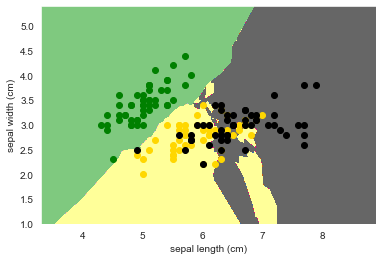

In [41]:
from sklearn.neighbors import KNeighborsClassifier

pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = KNeighborsClassifier(n_neighbors=10).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)

In [42]:
clf.score(X,y)

0.8466666666666667

In [43]:
iris.data.shape

(150, 4)

## 2.KNN Regression:

Посмотрим на пример искусственных двумерных данных (оранжевый) и предсказание этих данных по координате с помощью метода `knn`

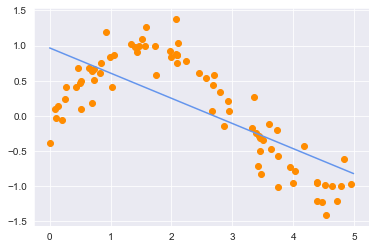

In [44]:
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# y = np.piecewise(X.flatten(), 
#                  [X.flatten() < 3, X.flatten() >= 3], [-1, 1]).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# clf = KNeighborsRegressor(n_neighbors=30, 
#                           #weights=gaussian_kernel
#                          ).fit(X, y)
clf = LinearRegression().fit(X, y)

y_ = clf.predict(X_test)
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

## Какое оптимальное число соседей `k`?

In [45]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

In [46]:
X = iris.data
y = iris.target

In [47]:
# "отбелим данные"
standardizer = StandardScaler()
X_std = standardizer.fit_transform(X)

In [48]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1).fit(X_std, y)

In [49]:
# новый класс объектов - пайплайн
pipe = Pipeline([('standardizer', standardizer), ('knn', knn)])

# построим сетку поиска
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [50]:
# и обозначим объект класса гридсерч или поиск по сетке
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_std, y)

In [51]:
# выведем параметры лучшей модели `best_estimator`
clf.best_estimator_.get_params()['knn__n_neighbors']

6

In [52]:
range(1,15)

range(1, 15)

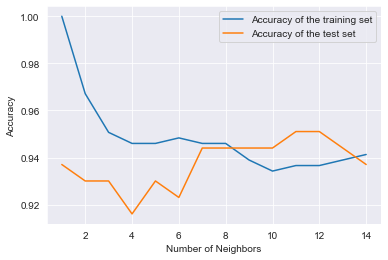

In [53]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
#     print(n_neighbors)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

#by looking at plot, best result accurs when n_neighbors is 6

In [54]:
y_test.shape

(143,)

In [55]:
knn.score(X_test,y_test)

0.9370629370629371

#### Как узнать, какие признаки были билее весомые для классификации?

В `sklearn` нет реализованого метода подсчета важности признака для этого типа классифкаторов.
Существуют методы которые позволяют косвенно оценить значимость признака - убирая его из выборки или заменяя радномными значениями. Или более сложные методы, как https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3281073/ 

Мы этим заниматься не будем, так как всегда проще интерпретировать модель Логистической регрессии (Линейной регрессии), даже если она немного проигрывает по точности.

### Самостоятельная работа:

1. Заполнить пропуски (пример кросс-валидации):

In [56]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, random_state=42)
X = cancer.data
y = cancer.target
i = 0
list_ = []  # обозначим пустой лист, куда будем записывать точность после каждой итерации

for train_index, test_index in kfold.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]  # срежем массив по нужным индексам, индексы выбираются в функции kfold
    y_train, y_test = y[train_index], y[test_index]
    
    knn.fit(X_train,y_train)
    list_.append(knn.score(X_test,y_test))
    
    print('Fold #', i)
    print(knn.score(X_test,y_test))
    
    i += 1  # следующая итерация

Fold # 0
0.896551724137931
Fold # 1
0.8620689655172413
Fold # 2
0.9122807017543859
Fold # 3
0.9649122807017544
Fold # 4
0.9649122807017544
Fold # 5
0.9298245614035088
Fold # 6
0.9649122807017544
Fold # 7
0.9464285714285714
Fold # 8
0.9107142857142857
Fold # 9
0.9464285714285714


In [60]:
knn_mean = np.asarray(list_).mean()
knn_std = np.asarray(list_).std()

In [61]:
knn_mean

0.9299034223489759

In [62]:
knn_std

0.03258168253160973

2. Повторить эксперимент с регуляризацией (и без на первой выборке) на 5-10 различных разбиениях 
`random_seed` или на кросс-валидации? (ДЗ)

In [57]:
kfold = StratifiedKFold(n_splits=10, random_state=42)

log_reg_l2 = LogisticRegression()  # первая, l2 регуляризация по "дефолту"
log_reg_l1 = LogisticRegression(penalty='l1', C=0.001) # вторая, l1 сильная регуляризация

X = cancer.data
y = cancer.target
i = 0
list_1 = []  # обозначим пустой лист, куда будем записывать точность после каждой итерации
list_2 = []

for train_index, test_index in kfold.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]  # срежем массив по нужным индексам, индексы выбираются в функции kfold
    y_train, y_test = y[train_index], y[test_index]
    
    log_reg_l1.fit(X_train,y_train)
    log_reg_l2.fit(X_train,y_train)
    
    list_1.append(log_reg_l1.score(X_test,y_test))
    list_2.append(log_reg_l2.score(X_test,y_test))
    
    print('Fold #', i)
    
    i += 1  # следующая итерация

Fold # 0
Fold # 1
Fold # 2
Fold # 3
Fold # 4
Fold # 5
Fold # 6
Fold # 7
Fold # 8
Fold # 9


In [58]:
print ('Среднее', np.mean(list_1), 'СТД',np.std(list_1)) # на трех признаках

Среднее 0.9139897156684815 СТД 0.019313316819022833


In [59]:
print ('Среднее',np.mean(list_2),'СТД', np.std(list_2)) # на 30 признаках

Среднее 0.9508998790078644 СТД 0.018502455120465704


Сравниваем результат через ttest

Если бы не была видна разница, то тогда увеличили число фолдов.

In [65]:
import scipy
from scipy import stats
stats.ttest_ind(np.array(list_1), np.array(list_2))

Ttest_indResult(statistic=-4.140086671526734, pvalue=0.0006148787308406672)

## Унести домой: 

- l1 и l2 нормы для регуляризации
- kNN - очень популярный алгоритм в тех случаях, когда объекты сравнимы и имеет место "похожесть" объектов.
- kNN сильно зависит от метрики. А значит и от масштаба признаков. Перед применением нужно привести признаки к одной шкале
- kNN плохо воспринимает большое (>100) количество признаков, т.к. объекты оказываются одинаково отдалены друг от друга в таких пространствах 